In [121]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import scipy.stats as stats
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

import Modeling3
import imp
imp.reload(Modeling3)
from Modeling3 import Catmodeling, LRmodeling

In [122]:
# 날짜 정보가 있는 데이터
data = pd.read_csv('최종_동태.csv')
data.index = pd.to_datetime(data['회계년도'])
data.drop('회계년도', axis=1, inplace=True)

In [123]:
## feature selection을 통해 선택된 원래의 train data
df_train_original = pd.read_csv('동태3겹rus_train_origin.csv')
x_columns = list(df_train_original.drop(['부실여부'], axis=1).columns)
x_columns_target = list(df_train_original.columns)
len(x_columns_target)

20

In [124]:
### 학습데이터, 테스트 데이터로 분할
data_test = data[data.index >= datetime.strptime('2021-12-01', '%Y-%m-%d')]
data_train = data[data.index < datetime.strptime('2021-12-01', '%Y-%m-%d')]

# 회사명과 거래소 코드  정보를 남겨놓기 위한거
data_name = data_train[['회사명', '거래소코드']]

In [125]:
# 원래 데이터와 생성된 가짜 데이터가 섞여있는거
df_train_temp = pd.read_csv('CTGAN_oversampled_train_1_1.csv')    ######################### 스모트 비율에 맞는거를 불러오도록 해

In [126]:
# 가짜 데이터 생성
temptemp = df_train_temp[x_columns_target].merge(df_train_original[x_columns_target], indicator=True, how='outer')
df_train_generated = temptemp[temptemp['_merge'] == 'left_only']
df_train_generated.drop(['_merge'], axis=1, inplace=True)

In [127]:
# 진짜 데이터에 날짜 데이터 부여
df_train_original.index = data_train.index

In [128]:
# 테스트 데이터 불러오기
df_test = pd.read_csv('최종_동태_test.csv')
df_test.index = pd.to_datetime(df_test['회계년도'])
df_test.drop('회계년도', axis=1, inplace=True)

In [129]:
# 진짜 데이터를 4개의 폴드로 나눈거
fold1 = df_train_original[(df_train_original.index >= datetime.strptime('2012-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2014-12-01', '%Y-%m-%d'))].index
fold2 = df_train_original[(df_train_original.index >= datetime.strptime('2015-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2016-12-01', '%Y-%m-%d'))].index
fold3 = df_train_original[(df_train_original.index >= datetime.strptime('2017-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2018-12-01', '%Y-%m-%d'))].index
fold4 = df_train_original[(df_train_original.index >= datetime.strptime('2019-12-01', '%Y-%m-%d')) & (df_train_original.index <= datetime.strptime('2020-12-01', '%Y-%m-%d'))].index

In [130]:
# 생성된 데이터에 대해 랜덤하게 날짜를 부여
import random

weights = [len(fold1), len(fold2), len(fold3), len(fold4)]
values = [list(fold1.unique()), list(fold2.unique()), list(fold3.unique()), list(fold4.unique())]
generated_index = []
for i in range(len(df_train_generated.index)):

    selected_list = random.choices(values, weights=weights, k=1)[0]
    selected_value = random.choice(selected_list)
    generated_index.append(selected_value)

df_train_generated.index = generated_index

In [131]:
df_train = pd.concat([df_train_original, df_train_generated], axis=0)

In [132]:
# df_train = df_train_original

In [133]:
df_train['부실여부'].value_counts()

부실여부
0.0    131308
1.0      5538
Name: count, dtype: int64

In [134]:
cat = Catmodeling(df_train, df_test, x_columns)

In [135]:
# params = cat.my_tuning()

In [136]:
# best_params_df = pd.DataFrame([params])
# best_params_df.to_csv('CatCat.csv', index=False)   ##################### 스모트 비율에 맞게 파일명 바꿔가면서 저장해

In [137]:
#### 여기는 csv 파일 불러오는거니 일단은 신경 안써도 됨
param_info = pd.read_csv('CTGAN_oversampled_train_1_1.csv')
param_dict = {}
for column in param_info:
    param_dict[column] = param_info[column].iloc[0]
param_dict

{'C': 54.34013069493952, 'fit_intercept': 0}

In [138]:
# weights = (df_train['부실여부'].value_counts()[0]/df_train['부실여부'].value_counts()[1])
# print(weights)
# class_weights = [1, weights] 
# param_dict['class_weights'] = class_weights

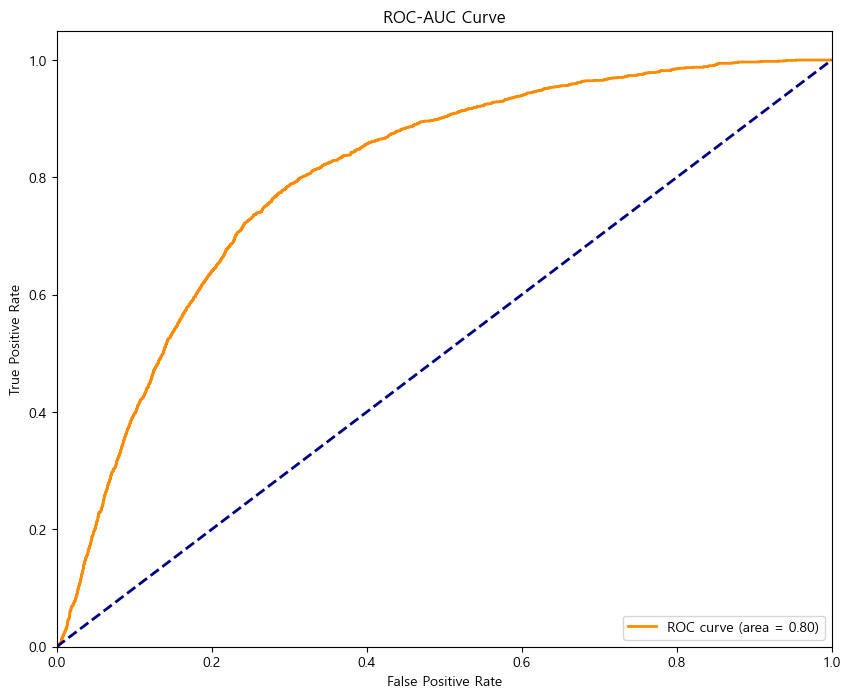

Threshold : 0.0
혼돈행렬 : [[    0 36455]
 [    0  1788]]
정확도 : 0.0468
정밀도 : 0.0468
재현율 : 1.0
roc_auc 스코어 : 0.7996
f1 스코어 : 0.0893


Threshold : 0.0
혼돈행렬 : [[    0 36455]
 [    0  1788]]
정확도 : 0.0468
정밀도 : 0.0468
재현율 : 1.0
roc_auc 스코어 : 0.7996
f1 스코어 : 0.0893


Threshold : 0.0
혼돈행렬 : [[    0 36455]
 [    0  1788]]
정확도 : 0.0468
정밀도 : 0.0468
재현율 : 1.0
roc_auc 스코어 : 0.7996
f1 스코어 : 0.0893


Threshold : 0.0
혼돈행렬 : [[    0 36455]
 [    0  1788]]
정확도 : 0.0468
정밀도 : 0.0468
재현율 : 1.0
roc_auc 스코어 : 0.7996
f1 스코어 : 0.0893


Threshold : 0.00012095922700446418
혼돈행렬 : [[ 5548 30907]
 [   16  1772]]
정확도 : 0.1914
정밀도 : 0.0542
재현율 : 0.9911
roc_auc 스코어 : 0.7996
f1 스코어 : 0.1028


Threshold : 0.0052491643552095915
혼돈행렬 : [[11367 25088]
 [   63  1725]]
정확도 : 0.3423
정밀도 : 0.0643
재현율 : 0.9648
roc_auc 스코어 : 0.7996
f1 스코어 : 0.1206


Threshold : 0.010377369483414722
혼돈행렬 : [[14022 22433]
 [   98  1690]]
정확도 : 0.4108
정밀도 : 0.0701
재현율 : 0.9452
roc_auc 스코어 : 0.7996
f1 스코어 : 0.1304


Threshold : 0.015505574611619846
혼

In [139]:
cat.my_modeling(param_dict)